In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 5.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
import cv2
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import albumentations as A
import ultralytics

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/My Drive")
!ls

'1-5 вопросы.docx'
 2023_Разделение_на_минигруппы.xlsx
 5SowRbEtXrc.jpg
'A6 - Мастер-группа Про | Математика ОГЭ с Семёном. ЗАЧЕТЫ (Апрель).gsheet'
'A6 - Мастер-группа Про | Математика ОГЭ с Семёном. ЗАЧЕТЫ (Май) .gsheet'
'A6 - Мастер-группа Про | Математика ОГЭ с Семёном. ЗАЧЕТЫ (Март).gsheet'
'B3 - Мастер-группа Про | Математика ОГЭ с Семёном. ЗАЧЕТЫ (Апрель) .gsheet'
'B3 - Мастер-группа Про | Математика ОГЭ с Семёном. ЗАЧЕТЫ (Май).gsheet'
'B3 - Мастер-группа Про | Математика ОГЭ с Семёном. ЗАЧЕТЫ (Март) .gsheet'
 best_model_PAN.pt
 best_model.pt
 best_model_unet.pt
 cats.jpg
'Colab Notebooks'
 DATA
 data.csv
 DWH_tinkoff.txt
 e70df564-4618-11ec-bfbd-02420a0005ef.sig
 e70df564-4618-11ec-bfbd-02420a0005ef.zip
 Elephant.jpg
'F6 - Основной курс Про | Математика ОГЭ с Даниром | 2.0.gsheet'
 final_Kravchenko8В01.zip
 genres
'helper_functions (1).py'
'helper_functions (2).py'
'helper_functions (3).py'
 helper_functions.py
 homework.png
 lab1
 ML_task4_Kravchenko_Timofey.zip
 model

In [ ]:
images  = os.listdir('Plant segmentation/images')
masks = os.listdir('Plant segmentation/masks')

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
col = {'images':images,'masks': masks}
df_merged = pd.DataFrame(col)
df_merged.to_csv('data.csv')

In [ ]:
df_merged

,images,masks
0,T02_Box007_2017-09-04T07-12-53-482.png,T02_Box007_2017-10-21T12-59-39-128.png
1,T02_Box007_2017-09-04T10-46-12-638.png,T02_Box007_2017-09-11T10-38-11-116.png
2,T02_Box007_2017-09-06T10-42-48-553.png,T02_Box007_2017-10-05T11-28-46-290.png
3,T02_Box007_2017-09-04T13-12-49-447.png,T02_Box007_2017-09-04T13-12-49-447.png
4,T02_Box007_2017-09-05T09-21-20-473.png,T02_Box007_2017-10-18T10-44-50-088.png
...,...,...
139,T02_Box051_2017-10-27T09-25-38-899.png,T02_Box051_2017-09-04T10-44-11-279.png
140,T02_Box051_2017-10-26T09-07-39-743.png,T02_Box029_2017-10-19T09-15-32-949.png
141,T02_Box051_2017-10-30T10-00-27-581.png,T02_Box029_2017-09-28T10-16-12-179.png
142,T02_Box051_2017-10-29T11-19-23-402.png,T02_Box029_2017-10-03T14-30-18-783.png


In [ ]:
df_merged['images'] = 'Plant segmentation/images/' + df_merged['images']
df_merged['masks'] = 'Plant segmentation/masks/' + df_merged['masks']

In [ ]:
df_merged

,images,masks
0,Plant segmentation/images/T02_Box007_2017-09-0...,Plant segmentation/masks/T02_Box007_2017-10-21...
1,Plant segmentation/images/T02_Box007_2017-09-0...,Plant segmentation/masks/T02_Box007_2017-09-11...
2,Plant segmentation/images/T02_Box007_2017-09-0...,Plant segmentation/masks/T02_Box007_2017-10-05...
3,Plant segmentation/images/T02_Box007_2017-09-0...,Plant segmentation/masks/T02_Box007_2017-09-04...
4,Plant segmentation/images/T02_Box007_2017-09-0...,Plant segmentation/masks/T02_Box007_2017-10-18...
...,...,...
139,Plant segmentation/images/T02_Box051_2017-10-2...,Plant segmentation/masks/T02_Box051_2017-09-04...
140,Plant segmentation/images/T02_Box051_2017-10-2...,Plant segmentation/masks/T02_Box029_2017-10-19...
141,Plant segmentation/images/T02_Box051_2017-10-3...,Plant segmentation/masks/T02_Box029_2017-09-28...
142,Plant segmentation/images/T02_Box051_2017-10-2...,Plant segmentation/masks/T02_Box029_2017-10-03...


In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self, df, transform = False):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row =  self.df.iloc[index]

        image_path = row[0]
        mask_path = row[1]

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = np.expand_dims(mask, axis=-1)

        if self.transform:
            data = self.transform(image = image, mask = mask)
            image = data['image']
            mask = data['mask']

        image = np.transpose(image, (2,0,1)).astype(np.float32)
        mask = np.transpose(mask, (2,0,1)).astype(np.float32)

        image = torch.Tensor(image) / 255.
        mask = torch.round(torch.Tensor(mask) / 255.)

        return image, mask

In [ ]:
IMG_SIZE = 128

def train_augmentations():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.RandomCrop(width=128, height=128),
        A.HorizontalFlip(p=0.2),
        A.VerticalFlip(p = 0.2),
        A.RandomBrightnessContrast(p=0.2),
        A.RandomRotate90(p=0.2)
    ])

def val_augmentations():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE)
    ])

In [ ]:
train_data, valid_data = train_test_split(df_merged, test_size=0.2, random_state=42)

In [ ]:
train_data = CustomDataset(train_data, train_augmentations())
valid_data = CustomDataset(valid_data, val_augmentations())

In [ ]:
train_data

In [ ]:
import random

index = random.randint(0,len(train_data))
image, mask = train_data[index]
image.shape, mask.shape

(torch.Size([3, 256, 256]), torch.Size([1, 256, 256]))

(-0.5, 4095.5, 2999.5, -0.5)

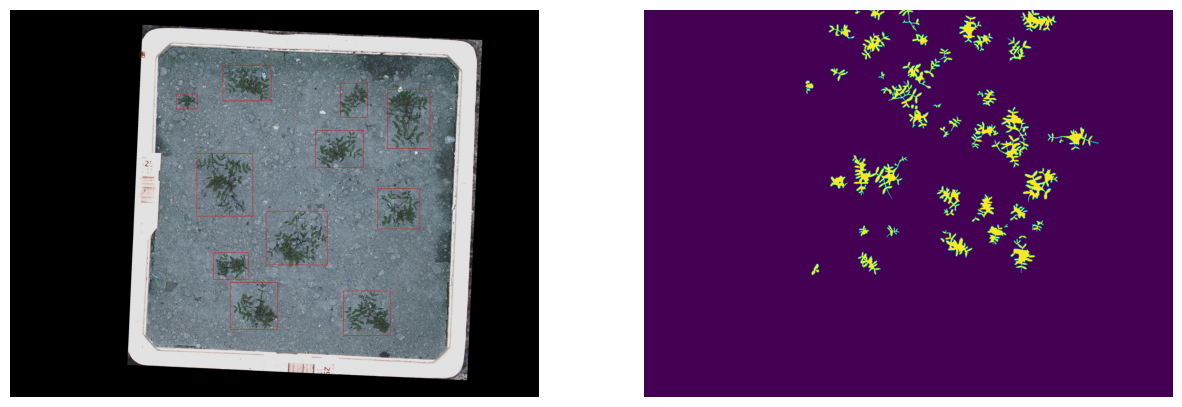

In [ ]:
plt.figure(figsize = (15,15))

index = random.randint(0,len(images))
img = cv2.imread(df_merged.iloc[index][0])
msk = cv2.imread(df_merged.iloc[index][1])
msk = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)
msk = np.expand_dims(msk, axis=-1)

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(msk)
plt.axis(False)

In [ ]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                              shuffle = True)

valid_dataloader = DataLoader(dataset = valid_data,
                              batch_size = BATCH_SIZE,
                               shuffle = False)

In [ ]:
img, msk = next(iter(train_dataloader))

In [ ]:
img.shape, msk.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 256, 256]))

In [ ]:
!pip install segmentation_models_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.4 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16429 sha256=48ac2eb3da5c20f291e0554f3f591281aa03f4f2cb49f24abe19d45f82debed9
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=59633fea26f660f9a6c5160b319a859c0dae3b844050992138dce1fc29b85c48
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels


In [ ]:
import segmentation_models_pytorch as smp
from torch import nn

In [ ]:
class SegModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.architecture = smp.FPN(
            encoder_name = 'tu-efficientnet_b0',
            encoder_weights = 'imagenet',
            in_channels = 3,
            classes = 1,
            activation = None
        )

    def forward(self, images, masks = None):
        logits = self.architecture(images)

        if (masks is not None):
            #print("Logits shape:", logits.shape)
            #print("Masks shape:", masks.shape)

            assert logits.shape == masks.shape, "Shapes of logits and masks must match"

            loss1 = smp.losses.DiceLoss(mode='binary')(logits,masks)
            loss2 = nn.BCEWithLogitsLoss()(logits,masks)

            return logits, loss1+loss2

        return logits

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SegModel()
model.to(device);

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
def train_fn(dataloader,model,optimizer):

    model.train()
    total_loss = 0.0
    for images,masks in tqdm(dataloader):
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()

        logits,loss = model(images,masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() #Tensor to number : [5] to 5

    return total_loss/len(dataloader) #Average loss

In [ ]:
def valid_fn(dataloader, model):

    model.eval()
    total_loss = 0.0
    with torch.inference_mode():
        for images, masks in tqdm(dataloader):
            images = images.to(device)
            masks = masks.to(device)

            #print("Images shape after transfer:", images.shape)  # Added print statement
            #print("Masks shape after transfer:", masks.shape)  # Added print statement

            logits,loss = model(images,masks)
            total_loss += loss.item()

    return total_loss/len(dataloader)

In [ ]:
epochs = 100
best_valid_loss = np.Inf

optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.001)

for epoch in range(epochs):

    train_loss = train_fn(train_dataloader, model, optimizer)
    valid_loss = valid_fn(valid_dataloader, model)

    if(valid_loss < best_valid_loss):
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'best_model.pt')
        print("The model is saved")

    print(f"Epoch: {epoch+1} | Training loss: {train_loss} | Validation loss: {valid_loss}")

100%|██████████| 1/1 [00:25<00:00, 25.63s/it]


The model is saved
Epoch: 1 | Training loss: 1.2556015849113464 | Validation loss: 1.4519855976104736


100%|██████████| 1/1 [00:14<00:00, 14.78s/it]


The model is saved
Epoch: 2 | Training loss: 1.1577747762203217 | Validation loss: 1.3759621381759644


100%|██████████| 1/1 [00:14<00:00, 14.77s/it]


The model is saved
Epoch: 3 | Training loss: 1.147121101617813 | Validation loss: 1.2167727947235107


100%|██████████| 1/1 [00:15<00:00, 15.08s/it]


The model is saved
Epoch: 4 | Training loss: 1.067465752363205 | Validation loss: 1.2027156352996826


100%|██████████| 1/1 [00:14<00:00, 14.78s/it]


The model is saved
Epoch: 5 | Training loss: 1.035284161567688 | Validation loss: 1.1868772506713867


100%|██████████| 1/1 [00:14<00:00, 14.63s/it]


The model is saved
Epoch: 6 | Training loss: 1.008617877960205 | Validation loss: 1.1829586029052734


100%|██████████| 1/1 [00:14<00:00, 14.71s/it]


The model is saved
Epoch: 7 | Training loss: 0.9795340746641159 | Validation loss: 1.1256787776947021


100%|██████████| 1/1 [00:14<00:00, 14.82s/it]


The model is saved
Epoch: 8 | Training loss: 0.9789925664663315 | Validation loss: 1.1255483627319336


100%|██████████| 1/1 [00:14<00:00, 14.61s/it]


Epoch: 9 | Training loss: 0.9872893840074539 | Validation loss: 1.1896204948425293


100%|██████████| 1/1 [00:14<00:00, 14.58s/it]


The model is saved
Epoch: 10 | Training loss: 0.9451835453510284 | Validation loss: 1.1185729503631592


100%|██████████| 1/1 [00:15<00:00, 15.62s/it]


The model is saved
Epoch: 11 | Training loss: 0.9393179267644882 | Validation loss: 1.1147228479385376


100%|██████████| 1/1 [00:15<00:00, 15.20s/it]


Epoch: 12 | Training loss: 0.9347579926252365 | Validation loss: 1.1321202516555786


100%|██████████| 1/1 [00:14<00:00, 14.70s/it]


Epoch: 13 | Training loss: 0.8865117877721786 | Validation loss: 1.1698559522628784


100%|██████████| 1/1 [00:14<00:00, 14.87s/it]


Epoch: 14 | Training loss: 0.9210129380226135 | Validation loss: 1.2263154983520508


100%|██████████| 1/1 [00:14<00:00, 14.83s/it]


Epoch: 15 | Training loss: 0.9204249083995819 | Validation loss: 1.150189757347107


100%|██████████| 1/1 [00:14<00:00, 14.81s/it]


Epoch: 16 | Training loss: 0.8680791556835175 | Validation loss: 1.1599568128585815


100%|██████████| 1/1 [00:14<00:00, 14.71s/it]


Epoch: 17 | Training loss: 0.8906715363264084 | Validation loss: 1.2056589126586914


100%|██████████| 1/1 [00:14<00:00, 14.70s/it]


Epoch: 18 | Training loss: 0.8629065454006195 | Validation loss: 1.1779825687408447


100%|██████████| 1/1 [00:15<00:00, 15.15s/it]


Epoch: 19 | Training loss: 0.8804138600826263 | Validation loss: 1.1446621417999268


100%|██████████| 1/1 [00:14<00:00, 14.42s/it]


Epoch: 20 | Training loss: 0.8553209602832794 | Validation loss: 1.1549057960510254


100%|██████████| 1/1 [00:14<00:00, 14.63s/it]


Epoch: 21 | Training loss: 0.8649841547012329 | Validation loss: 1.150801658630371


100%|██████████| 1/1 [00:14<00:00, 14.54s/it]


Epoch: 22 | Training loss: 0.8552212715148926 | Validation loss: 1.197519063949585


100%|██████████| 1/1 [00:14<00:00, 14.96s/it]


Epoch: 23 | Training loss: 0.8920137882232666 | Validation loss: 1.160024642944336


100%|██████████| 1/1 [00:14<00:00, 14.65s/it]


Epoch: 24 | Training loss: 0.8771879523992538 | Validation loss: 1.1405727863311768


100%|██████████| 1/1 [00:14<00:00, 14.55s/it]


Epoch: 25 | Training loss: 0.8821069747209549 | Validation loss: 1.2454482316970825


100%|██████████| 1/1 [00:15<00:00, 15.08s/it]


Epoch: 26 | Training loss: 0.8548889309167862 | Validation loss: 1.1589760780334473


100%|██████████| 1/1 [00:14<00:00, 14.61s/it]


Epoch: 27 | Training loss: 0.8481624275445938 | Validation loss: 1.1438645124435425


100%|██████████| 1/1 [00:14<00:00, 14.70s/it]


Epoch: 28 | Training loss: 0.8200526833534241 | Validation loss: 1.1537808179855347


100%|██████████| 1/1 [00:14<00:00, 14.57s/it]


Epoch: 29 | Training loss: 0.794678345322609 | Validation loss: 1.1522061824798584


100%|██████████| 1/1 [00:16<00:00, 16.12s/it]


Epoch: 30 | Training loss: 0.8037721812725067 | Validation loss: 1.131487488746643


100%|██████████| 1/1 [00:14<00:00, 14.56s/it]


Epoch: 31 | Training loss: 0.797708049416542 | Validation loss: 1.1319929361343384


100%|██████████| 1/1 [00:14<00:00, 14.59s/it]


Epoch: 32 | Training loss: 0.757892295718193 | Validation loss: 1.1392260789871216


100%|██████████| 1/1 [00:14<00:00, 14.97s/it]


Epoch: 33 | Training loss: 0.7955106049776077 | Validation loss: 1.144455075263977


100%|██████████| 1/1 [00:14<00:00, 14.59s/it]


Epoch: 34 | Training loss: 0.7631394863128662 | Validation loss: 1.141516923904419


100%|██████████| 1/1 [00:14<00:00, 14.61s/it]


Epoch: 35 | Training loss: 0.8036836385726929 | Validation loss: 1.1517819166183472


100%|██████████| 1/1 [00:15<00:00, 15.08s/it]


Epoch: 36 | Training loss: 0.7704726606607437 | Validation loss: 1.20722234249115


100%|██████████| 1/1 [00:15<00:00, 15.29s/it]


Epoch: 37 | Training loss: 0.787585899233818 | Validation loss: 1.1413133144378662


100%|██████████| 1/1 [00:14<00:00, 14.75s/it]


Epoch: 38 | Training loss: 0.8063515573740005 | Validation loss: 1.128227710723877


100%|██████████| 1/1 [00:14<00:00, 14.64s/it]


Epoch: 39 | Training loss: 0.740194633603096 | Validation loss: 1.1403133869171143


100%|██████████| 1/1 [00:14<00:00, 14.81s/it]


Epoch: 40 | Training loss: 0.724131315946579 | Validation loss: 1.1982518434524536


100%|██████████| 1/1 [00:15<00:00, 15.25s/it]


Epoch: 41 | Training loss: 0.7809514254331589 | Validation loss: 1.1359012126922607


100%|██████████| 1/1 [00:14<00:00, 14.84s/it]


Epoch: 42 | Training loss: 0.7789274007081985 | Validation loss: 1.1751829385757446


100%|██████████| 1/1 [00:15<00:00, 15.66s/it]


Epoch: 43 | Training loss: 0.7156527191400528 | Validation loss: 1.1481046676635742


100%|██████████| 1/1 [00:14<00:00, 14.70s/it]


Epoch: 44 | Training loss: 0.7411590069532394 | Validation loss: 1.169580101966858


100%|██████████| 1/1 [00:15<00:00, 15.23s/it]


Epoch: 45 | Training loss: 0.720981165766716 | Validation loss: 1.216683268547058


100%|██████████| 1/1 [00:14<00:00, 14.60s/it]


Epoch: 46 | Training loss: 0.7331431657075882 | Validation loss: 1.1824582815170288


100%|██████████| 1/1 [00:14<00:00, 14.88s/it]


Epoch: 47 | Training loss: 0.7137279808521271 | Validation loss: 1.2262791395187378


100%|██████████| 1/1 [00:15<00:00, 15.40s/it]


Epoch: 48 | Training loss: 0.7350282669067383 | Validation loss: 1.2087479829788208


100%|██████████| 1/1 [00:14<00:00, 14.62s/it]


Epoch: 49 | Training loss: 0.6873144060373306 | Validation loss: 1.1650915145874023


100%|██████████| 1/1 [00:14<00:00, 14.69s/it]


Epoch: 50 | Training loss: 0.7235140651464462 | Validation loss: 1.1824853420257568


100%|██████████| 1/1 [00:14<00:00, 14.63s/it]


Epoch: 51 | Training loss: 0.7198297083377838 | Validation loss: 1.1672911643981934


100%|██████████| 1/1 [00:14<00:00, 14.69s/it]


Epoch: 52 | Training loss: 0.6819660067558289 | Validation loss: 1.208793044090271


100%|██████████| 1/1 [00:15<00:00, 15.11s/it]


Epoch: 53 | Training loss: 0.6795676648616791 | Validation loss: 1.237885594367981


100%|██████████| 1/1 [00:14<00:00, 14.72s/it]


Epoch: 54 | Training loss: 0.6834847331047058 | Validation loss: 1.2113580703735352


100%|██████████| 1/1 [00:15<00:00, 15.09s/it]


Epoch: 55 | Training loss: 0.6655775308609009 | Validation loss: 1.22079598903656


100%|██████████| 1/1 [00:14<00:00, 14.54s/it]


Epoch: 56 | Training loss: 0.6790405809879303 | Validation loss: 1.2303738594055176


100%|██████████| 1/1 [00:14<00:00, 14.66s/it]


Epoch: 57 | Training loss: 0.670737624168396 | Validation loss: 1.2289835214614868


100%|██████████| 1/1 [00:14<00:00, 14.64s/it]


Epoch: 58 | Training loss: 0.6786350309848785 | Validation loss: 1.2338271141052246


100%|██████████| 1/1 [00:15<00:00, 15.12s/it]


Epoch: 59 | Training loss: 0.7155056595802307 | Validation loss: 1.2182990312576294


100%|██████████| 1/1 [00:14<00:00, 14.62s/it]


Epoch: 60 | Training loss: 0.686778649687767 | Validation loss: 1.2149786949157715


100%|██████████| 1/1 [00:14<00:00, 14.47s/it]


Epoch: 61 | Training loss: 0.6552478522062302 | Validation loss: 1.2641416788101196


100%|██████████| 1/1 [00:14<00:00, 14.68s/it]


Epoch: 62 | Training loss: 0.6749363541603088 | Validation loss: 1.218998908996582


100%|██████████| 1/1 [00:15<00:00, 15.24s/it]


Epoch: 63 | Training loss: 0.668527141213417 | Validation loss: 1.191004991531372


100%|██████████| 1/1 [00:14<00:00, 14.66s/it]


Epoch: 64 | Training loss: 0.6341031640768051 | Validation loss: 1.203687310218811


100%|██████████| 1/1 [00:14<00:00, 14.73s/it]


Epoch: 65 | Training loss: 0.6589807271957397 | Validation loss: 1.1860142946243286


100%|██████████| 1/1 [00:14<00:00, 14.57s/it]


Epoch: 66 | Training loss: 0.6210683882236481 | Validation loss: 1.2398335933685303


100%|██████████| 1/1 [00:15<00:00, 15.28s/it]


Epoch: 67 | Training loss: 0.6369938999414444 | Validation loss: 1.1949000358581543


100%|██████████| 1/1 [00:14<00:00, 14.54s/it]


Epoch: 68 | Training loss: 0.6626384854316711 | Validation loss: 1.1756913661956787


100%|██████████| 1/1 [00:14<00:00, 14.76s/it]


Epoch: 69 | Training loss: 0.6077092289924622 | Validation loss: 1.247823715209961


100%|██████████| 1/1 [00:14<00:00, 14.74s/it]


Epoch: 70 | Training loss: 0.6329971998929977 | Validation loss: 1.2283873558044434


100%|██████████| 1/1 [00:14<00:00, 14.63s/it]


Epoch: 71 | Training loss: 0.6320292949676514 | Validation loss: 1.218013882637024


100%|██████████| 1/1 [00:14<00:00, 14.61s/it]


Epoch: 72 | Training loss: 0.6527853459119797 | Validation loss: 1.2193615436553955


100%|██████████| 1/1 [00:14<00:00, 14.55s/it]


Epoch: 73 | Training loss: 0.6498978435993195 | Validation loss: 1.1779277324676514


100%|██████████| 1/1 [00:15<00:00, 15.24s/it]


Epoch: 74 | Training loss: 0.6268202662467957 | Validation loss: 1.201961874961853


100%|██████████| 1/1 [00:14<00:00, 14.59s/it]


Epoch: 75 | Training loss: 0.6146007850766182 | Validation loss: 1.2137806415557861


100%|██████████| 1/1 [00:14<00:00, 14.63s/it]


Epoch: 76 | Training loss: 0.6153280586004257 | Validation loss: 1.1841362714767456


100%|██████████| 1/1 [00:14<00:00, 14.87s/it]


Epoch: 77 | Training loss: 0.6430899947881699 | Validation loss: 1.2064976692199707


100%|██████████| 1/1 [00:14<00:00, 14.68s/it]


Epoch: 78 | Training loss: 0.6475918591022491 | Validation loss: 1.2332382202148438


100%|██████████| 1/1 [00:14<00:00, 14.59s/it]


Epoch: 79 | Training loss: 0.5728134959936142 | Validation loss: 1.2130522727966309


100%|██████████| 1/1 [00:14<00:00, 14.73s/it]


Epoch: 80 | Training loss: 0.6551764458417892 | Validation loss: 1.2062734365463257


100%|██████████| 1/1 [00:15<00:00, 15.50s/it]


Epoch: 81 | Training loss: 0.631243497133255 | Validation loss: 1.2488125562667847


100%|██████████| 1/1 [00:14<00:00, 14.58s/it]


Epoch: 82 | Training loss: 0.6217670738697052 | Validation loss: 1.2333521842956543


100%|██████████| 1/1 [00:14<00:00, 14.55s/it]


Epoch: 83 | Training loss: 0.6140550225973129 | Validation loss: 1.2171039581298828


100%|██████████| 1/1 [00:14<00:00, 14.96s/it]


Epoch: 84 | Training loss: 0.6148132756352425 | Validation loss: 1.2508728504180908


100%|██████████| 1/1 [00:14<00:00, 14.80s/it]


Epoch: 85 | Training loss: 0.6265043616294861 | Validation loss: 1.2200541496276855


100%|██████████| 1/1 [00:14<00:00, 14.54s/it]


Epoch: 86 | Training loss: 0.6201164275407791 | Validation loss: 1.2511818408966064


100%|██████████| 1/1 [00:14<00:00, 14.91s/it]


Epoch: 87 | Training loss: 0.5991674959659576 | Validation loss: 1.2504074573516846


100%|██████████| 1/1 [00:14<00:00, 14.59s/it]


Epoch: 88 | Training loss: 0.6096085458993912 | Validation loss: 1.2346457242965698


100%|██████████| 1/1 [00:14<00:00, 14.59s/it]


Epoch: 89 | Training loss: 0.5917567014694214 | Validation loss: 1.2765432596206665


100%|██████████| 1/1 [00:14<00:00, 14.51s/it]


Epoch: 90 | Training loss: 0.6479098200798035 | Validation loss: 1.2584699392318726


100%|██████████| 1/1 [00:14<00:00, 14.68s/it]


Epoch: 91 | Training loss: 0.5990040898323059 | Validation loss: 1.2386189699172974


100%|██████████| 1/1 [00:15<00:00, 15.52s/it]


Epoch: 92 | Training loss: 0.5935854315757751 | Validation loss: 1.2789762020111084


100%|██████████| 1/1 [00:14<00:00, 14.47s/it]


Epoch: 93 | Training loss: 0.6351134926080704 | Validation loss: 1.2475101947784424


100%|██████████| 1/1 [00:15<00:00, 15.33s/it]


Epoch: 94 | Training loss: 0.5878732055425644 | Validation loss: 1.252286434173584


100%|██████████| 1/1 [00:14<00:00, 14.50s/it]


Epoch: 95 | Training loss: 0.6293256431818008 | Validation loss: 1.2613751888275146


100%|██████████| 1/1 [00:14<00:00, 14.64s/it]


Epoch: 96 | Training loss: 0.5958034694194794 | Validation loss: 1.231953740119934


100%|██████████| 1/1 [00:14<00:00, 14.84s/it]


Epoch: 97 | Training loss: 0.592611774802208 | Validation loss: 1.2390509843826294


100%|██████████| 1/1 [00:14<00:00, 14.58s/it]


Epoch: 98 | Training loss: 0.6798447519540787 | Validation loss: 1.2228091955184937


100%|██████████| 1/1 [00:14<00:00, 14.57s/it]


Epoch: 99 | Training loss: 0.5559022128582001 | Validation loss: 1.2689168453216553


100%|██████████| 1/1 [00:14<00:00, 14.83s/it]

Epoch: 100 | Training loss: 0.6101305335760117 | Validation loss: 1.2541170120239258


In [ ]:
model.load_state_dict(torch.load('best_model.pt'))

<All keys matched successfully>

In [ ]:
def show_images(gen, type_of_image):
    '''
    This function take the data generator and show sample of the images
    '''
    images = []
    masks = []
    pred_masks = []
    # return classes , images to be displayed
    for image, mask in valid_data:
       image = image.to(device)
       logits_mask = model(image.unsqueeze(0))
       pred_mask = torch.sigmoid(logits_mask)
       pred_mask = (pred_mask > 0.5) * 1.0
       images.append(image.detach().cpu())
       pred_masks.append(pred_mask.detach().cpu().squeeze(0))
       masks.append(mask)

    length = len(image)
    sample = min(length, 25)

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i]       # scales data to range (0 - 255)
        mask = masks[i]
        pred_mask = pred_masks[i]
        if type_of_image == 0:
            plt.imshow(image.permute(1, 2, 0))
            plt.title('image for segmentation', color= 'blue', fontsize= 12)
            plt.axis('off')
        elif type_of_image == 1:
            plt.imshow(mask.permute(1, 2, 0))
            plt.title('valid mask', color= 'blue', fontsize= 12)
            plt.axis('off')
        elif type_of_image == 2:
            plt.imshow(pred_mask.permute(1, 2, 0))
            plt.title('predicted mask', color= 'blue', fontsize= 12)
            plt.axis('off')
    plt.show()


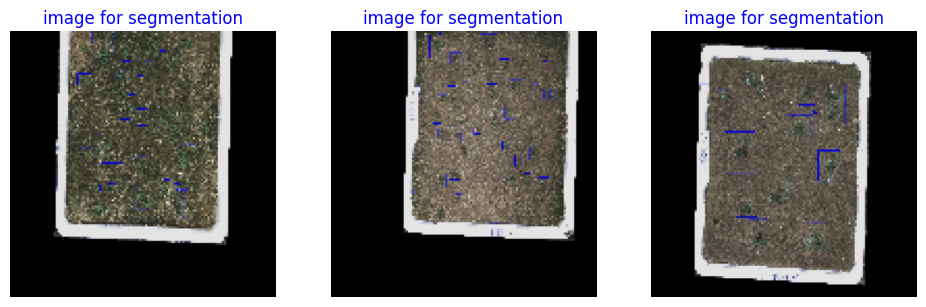

In [ ]:
show_images(valid_data, 0)

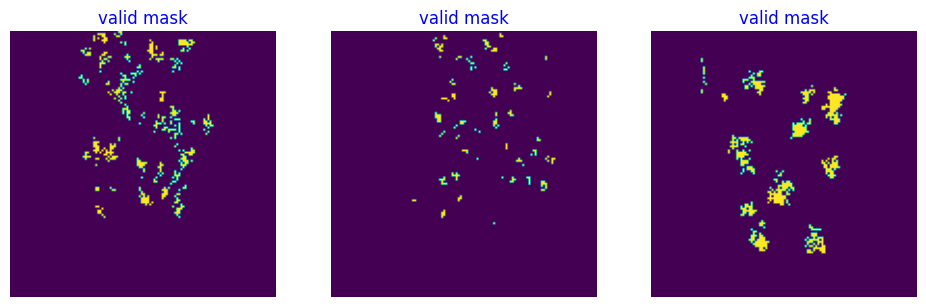

In [ ]:
show_images(valid_data, 1)

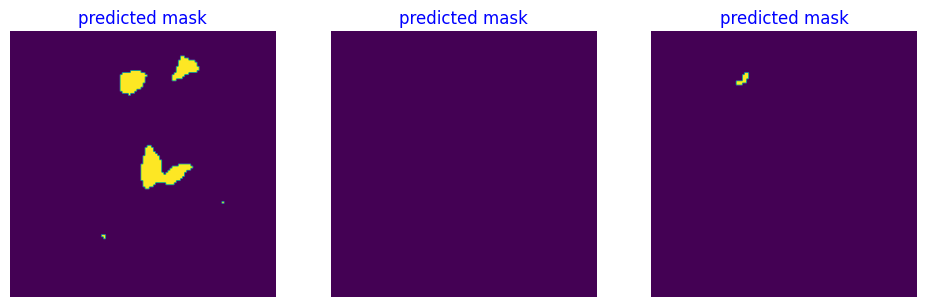

In [ ]:
show_images(valid_data, 2)

In [ ]:
class SegModel_Unet(nn.Module):

    def __init__(self):
        super().__init__()

        self.architecture = smp.Unet(
            encoder_name = 'tu-efficientnet_b0',
            encoder_weights = 'resnet34',
            in_channels = 3,
            classes = 1,
            activation = None
        )

    def forward(self, images, masks = None):
        logits = self.architecture(images)

        if (masks is not None):
            #print("Logits shape:", logits.shape)
            #print("Masks shape:", masks.shape)

            assert logits.shape == masks.shape, "Shapes of logits and masks must match"

            loss1 = smp.losses.DiceLoss(mode='binary')(logits,masks)
            loss2 = nn.BCEWithLogitsLoss()(logits,masks)

            return logits, loss1+loss2

        return logits

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SegModel_Unet()
model.to(device);

In [ ]:
epochs = 40
best_valid_loss = np.Inf

optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.001)

for epoch in range(epochs):

    train_loss = train_fn(train_dataloader, model, optimizer)
    valid_loss = valid_fn(valid_dataloader, model)

    if(valid_loss < best_valid_loss):
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'best_model_unet.pt')
        print("The model is saved")

    print(f"Epoch: {epoch+1} | Training loss: {train_loss} | Validation loss: {valid_loss}")

100%|██████████| 1/1 [00:14<00:00, 14.23s/it]


The model is saved
Epoch: 1 | Training loss: 1.402125060558319 | Validation loss: 1.3745665550231934


100%|██████████| 1/1 [00:14<00:00, 14.20s/it]


The model is saved
Epoch: 2 | Training loss: 1.2932307124137878 | Validation loss: 1.251476526260376


100%|██████████| 1/1 [00:14<00:00, 14.40s/it]


The model is saved
Epoch: 3 | Training loss: 1.2156658470630646 | Validation loss: 1.210154414176941


100%|██████████| 1/1 [00:14<00:00, 14.68s/it]


The model is saved
Epoch: 4 | Training loss: 1.1597132086753845 | Validation loss: 1.1871180534362793


100%|██████████| 1/1 [00:14<00:00, 14.30s/it]


The model is saved
Epoch: 5 | Training loss: 1.1194932758808136 | Validation loss: 1.181601643562317


100%|██████████| 1/1 [00:14<00:00, 14.26s/it]


Epoch: 6 | Training loss: 1.0909796357154846 | Validation loss: 1.1929036378860474


100%|██████████| 1/1 [00:15<00:00, 15.53s/it]


The model is saved
Epoch: 7 | Training loss: 1.0728161036968231 | Validation loss: 1.1394071578979492


100%|██████████| 1/1 [00:14<00:00, 14.23s/it]


The model is saved
Epoch: 8 | Training loss: 1.0471870303153992 | Validation loss: 1.100800633430481


100%|██████████| 1/1 [00:14<00:00, 14.72s/it]


Epoch: 9 | Training loss: 1.0266966670751572 | Validation loss: 1.1437801122665405


100%|██████████| 1/1 [00:14<00:00, 14.27s/it]


Epoch: 10 | Training loss: 1.025252103805542 | Validation loss: 1.1040022373199463


100%|██████████| 1/1 [00:14<00:00, 14.21s/it]


The model is saved
Epoch: 11 | Training loss: 1.0203172415494919 | Validation loss: 1.0813493728637695


100%|██████████| 1/1 [00:14<00:00, 14.45s/it]


The model is saved
Epoch: 12 | Training loss: 0.9903498739004135 | Validation loss: 1.081182599067688


100%|██████████| 1/1 [00:14<00:00, 14.15s/it]


Epoch: 13 | Training loss: 0.9813756942749023 | Validation loss: 1.0812973976135254


100%|██████████| 1/1 [00:14<00:00, 14.42s/it]


Epoch: 14 | Training loss: 0.9808275401592255 | Validation loss: 1.12469482421875


100%|██████████| 1/1 [00:14<00:00, 14.30s/it]


Epoch: 15 | Training loss: 0.9569576233625412 | Validation loss: 1.128127098083496


100%|██████████| 1/1 [00:14<00:00, 14.31s/it]


Epoch: 16 | Training loss: 0.9627436995506287 | Validation loss: 1.0859230756759644


100%|██████████| 1/1 [00:14<00:00, 14.30s/it]


Epoch: 17 | Training loss: 0.9541210979223251 | Validation loss: 1.109365701675415


100%|██████████| 1/1 [00:14<00:00, 14.20s/it]


Epoch: 18 | Training loss: 0.9227584451436996 | Validation loss: 1.1221740245819092


100%|██████████| 1/1 [00:14<00:00, 14.98s/it]


Epoch: 19 | Training loss: 0.9262773394584656 | Validation loss: 1.0862886905670166


100%|██████████| 1/1 [00:14<00:00, 14.28s/it]


Epoch: 20 | Training loss: 0.9245768040418625 | Validation loss: 1.0903102159500122


100%|██████████| 1/1 [00:14<00:00, 14.25s/it]


Epoch: 21 | Training loss: 0.9388244897127151 | Validation loss: 1.1275681257247925


100%|██████████| 1/1 [00:14<00:00, 14.27s/it]


Epoch: 22 | Training loss: 0.9154907464981079 | Validation loss: 1.1345323324203491


100%|██████████| 1/1 [00:14<00:00, 14.23s/it]


Epoch: 23 | Training loss: 0.8964670300483704 | Validation loss: 1.1166424751281738


100%|██████████| 1/1 [00:14<00:00, 14.37s/it]


Epoch: 24 | Training loss: 0.9252986758947372 | Validation loss: 1.1271735429763794


100%|██████████| 1/1 [00:14<00:00, 14.26s/it]


Epoch: 25 | Training loss: 0.8955398499965668 | Validation loss: 1.095885157585144


100%|██████████| 1/1 [00:14<00:00, 14.67s/it]


Epoch: 26 | Training loss: 0.9023648351430893 | Validation loss: 1.1020762920379639


100%|██████████| 1/1 [00:14<00:00, 14.21s/it]


Epoch: 27 | Training loss: 0.8933694660663605 | Validation loss: 1.1080440282821655


100%|██████████| 1/1 [00:14<00:00, 14.30s/it]


Epoch: 28 | Training loss: 0.9250443875789642 | Validation loss: 1.135002851486206


100%|██████████| 1/1 [00:14<00:00, 14.33s/it]


Epoch: 29 | Training loss: 0.8816429078578949 | Validation loss: 1.0899090766906738


100%|██████████| 1/1 [00:15<00:00, 15.22s/it]


Epoch: 30 | Training loss: 0.9140443503856659 | Validation loss: 1.1081392765045166


100%|██████████| 1/1 [00:14<00:00, 14.73s/it]


Epoch: 31 | Training loss: 0.8773336857557297 | Validation loss: 1.103442907333374


100%|██████████| 1/1 [00:14<00:00, 14.32s/it]


Epoch: 32 | Training loss: 0.8652140200138092 | Validation loss: 1.1180658340454102


100%|██████████| 1/1 [00:14<00:00, 14.23s/it]


Epoch: 33 | Training loss: 0.8932836055755615 | Validation loss: 1.1095463037490845


100%|██████████| 1/1 [00:14<00:00, 14.29s/it]


Epoch: 34 | Training loss: 0.8547694981098175 | Validation loss: 1.1243951320648193


100%|██████████| 1/1 [00:14<00:00, 14.23s/it]


Epoch: 35 | Training loss: 0.873392254114151 | Validation loss: 1.1487324237823486


100%|██████████| 1/1 [00:14<00:00, 14.60s/it]


Epoch: 36 | Training loss: 0.8605479001998901 | Validation loss: 1.088294506072998


100%|██████████| 1/1 [00:14<00:00, 14.38s/it]


Epoch: 37 | Training loss: 0.8336960971355438 | Validation loss: 1.1281700134277344


100%|██████████| 1/1 [00:14<00:00, 14.21s/it]


Epoch: 38 | Training loss: 0.881380707025528 | Validation loss: 1.101029396057129


100%|██████████| 1/1 [00:14<00:00, 14.25s/it]


The model is saved
Epoch: 39 | Training loss: 0.8399731665849686 | Validation loss: 1.0794527530670166


100%|██████████| 1/1 [00:14<00:00, 14.28s/it]

Epoch: 40 | Training loss: 0.8363716900348663 | Validation loss: 1.1039469242095947


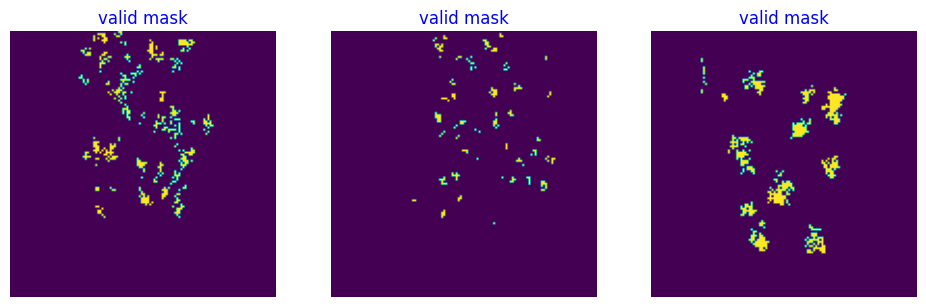

In [ ]:
show_images(valid_data, 1)

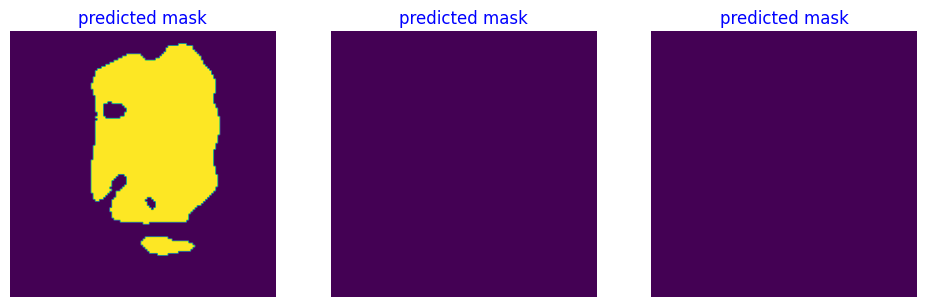

In [ ]:
show_images(valid_data, 2)

In [ ]:
class SegModel_PAN(nn.Module):

    def __init__(self):
        super().__init__()

        self.architecture = smp.PAN(
            encoder_name = 'tu-efficientnet_b0',
            encoder_weights = 'imagenet',
            in_channels = 3,
            classes = 1,
            activation = None
        )

    def forward(self, images, masks = None):
        logits = self.architecture(images)

        if (masks is not None):
            #print("Logits shape:", logits.shape)
            #print("Masks shape:", masks.shape)

            assert logits.shape == masks.shape, "Shapes of logits and masks must match"

            loss1 = smp.losses.DiceLoss(mode='binary')(logits,masks)
            loss2 = nn.BCEWithLogitsLoss()(logits,masks)

            return logits, loss1+loss2

        return logits

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SegModel_PAN()
model.to(device);

In [ ]:
epochs = 40
best_valid_loss = np.Inf

optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.001)

for epoch in range(epochs):

    train_loss = train_fn(train_dataloader, model, optimizer)
    valid_loss = valid_fn(valid_dataloader, model)

    if(valid_loss < best_valid_loss):
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'best_model_PAN.pt')
        print("The model is saved")

    print(f"Epoch: {epoch+1} | Training loss: {train_loss} | Validation loss: {valid_loss}")

100%|██████████| 1/1 [00:14<00:00, 14.77s/it]


The model is saved
Epoch: 1 | Training loss: 1.1910533905029297 | Validation loss: 1.1198225021362305


100%|██████████| 1/1 [00:14<00:00, 14.38s/it]


Epoch: 2 | Training loss: 1.083812564611435 | Validation loss: 1.1509801149368286


100%|██████████| 1/1 [00:14<00:00, 14.30s/it]


Epoch: 3 | Training loss: 1.0273856222629547 | Validation loss: 1.1220097541809082


100%|██████████| 1/1 [00:14<00:00, 14.31s/it]


The model is saved
Epoch: 4 | Training loss: 0.9980914145708084 | Validation loss: 1.0813639163970947


100%|██████████| 1/1 [00:14<00:00, 14.32s/it]


The model is saved
Epoch: 5 | Training loss: 1.0035055577754974 | Validation loss: 1.0790786743164062


100%|██████████| 1/1 [00:14<00:00, 14.68s/it]


Epoch: 6 | Training loss: 0.959654375910759 | Validation loss: 1.0987098217010498


100%|██████████| 1/1 [00:14<00:00, 14.21s/it]


Epoch: 7 | Training loss: 0.9872588664293289 | Validation loss: 1.098149061203003


100%|██████████| 1/1 [00:14<00:00, 14.55s/it]


Epoch: 8 | Training loss: 0.9696982502937317 | Validation loss: 1.1563634872436523


100%|██████████| 1/1 [00:14<00:00, 14.36s/it]


Epoch: 9 | Training loss: 0.9448486268520355 | Validation loss: 1.1068878173828125


100%|██████████| 1/1 [00:14<00:00, 14.37s/it]


The model is saved
Epoch: 10 | Training loss: 0.9434497952461243 | Validation loss: 1.0618538856506348


100%|██████████| 1/1 [00:14<00:00, 14.74s/it]


Epoch: 11 | Training loss: 0.9326535016298294 | Validation loss: 1.0900168418884277


100%|██████████| 1/1 [00:14<00:00, 14.42s/it]


Epoch: 12 | Training loss: 0.9297510534524918 | Validation loss: 1.0916414260864258


100%|██████████| 1/1 [00:14<00:00, 14.43s/it]


Epoch: 13 | Training loss: 0.9220269471406937 | Validation loss: 1.0910656452178955


100%|██████████| 1/1 [00:14<00:00, 14.29s/it]


Epoch: 14 | Training loss: 0.9060987681150436 | Validation loss: 1.1098352670669556


100%|██████████| 1/1 [00:14<00:00, 14.29s/it]


Epoch: 15 | Training loss: 0.9134186208248138 | Validation loss: 1.126157283782959


100%|██████████| 1/1 [00:14<00:00, 14.26s/it]


Epoch: 16 | Training loss: 0.931378185749054 | Validation loss: 1.1093063354492188


  0%|          | 0/4 [00:00<?, ?it/s]

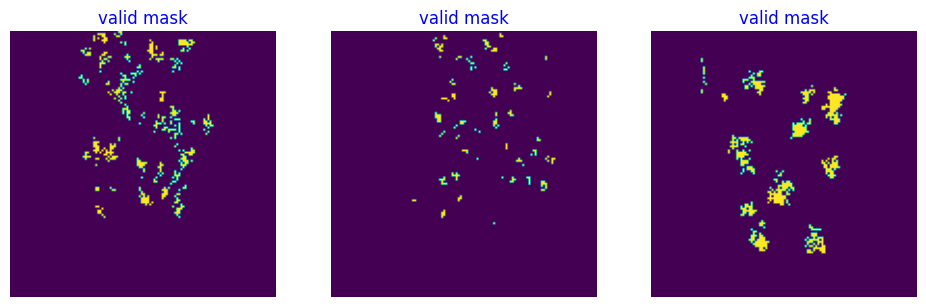

In [ ]:
show_images(valid_data, 1)

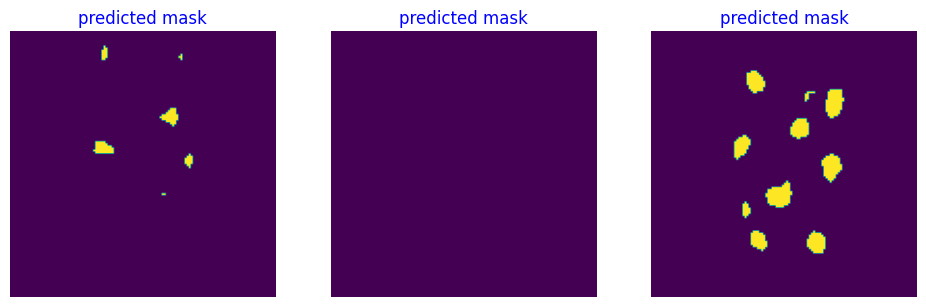

In [ ]:
show_images(valid_data, 2)

In [ ]:
class SegModel_DeepLabV3(nn.Module):

    def __init__(self):
        super().__init__()

        self.architecture = smp.DeepLabV3(
            encoder_name = 'resnet101',
            encoder_weights = 'imagenet',
            in_channels = 3,
            classes = 1,
            activation = None
        )

    def forward(self, images, masks = None):
        logits = self.architecture(images)

        if (masks is not None):
            #print("Logits shape:", logits.shape)
            #print("Masks shape:", masks.shape)

            assert logits.shape == masks.shape, "Shapes of logits and masks must match"

            loss1 = smp.losses.DiceLoss(mode='binary')(logits,masks)
            loss2 = nn.BCEWithLogitsLoss()(logits,masks)

            return logits, loss1+loss2

        return logits

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SegModel_DeepLabV3()
model.to(device);

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:10<00:00, 17.3MB/s]


In [ ]:
epochs = 100
best_valid_loss = np.Inf

optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.001)

for epoch in range(epochs):

    train_loss = train_fn(train_dataloader, model, optimizer)
    valid_loss = valid_fn(valid_dataloader, model)

    if(valid_loss < best_valid_loss):
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'best_model_deeplabv3.pt')
        print("The model is saved")

    print(f"Epoch: {epoch+1} | Training loss: {train_loss} | Validation loss: {valid_loss}")

  0%|          | 0/4 [00:18<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 13.06 MiB is free. Process 2378 has 14.73 GiB memory in use. Of the allocated memory 14.35 GiB is allocated by PyTorch, and 207.18 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### Let's check how yolo works

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from ultralytics.utils.plotting import Annotator
from PIL import Image

In [ ]:
model = YOLO('yolov8n.pt')  # initialize model
results = model('https://www.meme-arsenal.com/memes/71ad1875a47dee2693f00f5be0598e2f.jpg')  # perform inference  # display results for the first image
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image

100%|███████████████████████████████████████████████████████████████████████████████| 105k/105k [00:00<00:00, 21.4MB/s]


image 1/1 C:\Users\te200\PycharmProjects\soilrx\ml\Segmentation\71ad1875a47dee2693f00f5be0598e2f.jpg: 512x640 1 cat, 1 couch, 104.0ms
Speed: 6.0ms preprocess, 104.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 640)


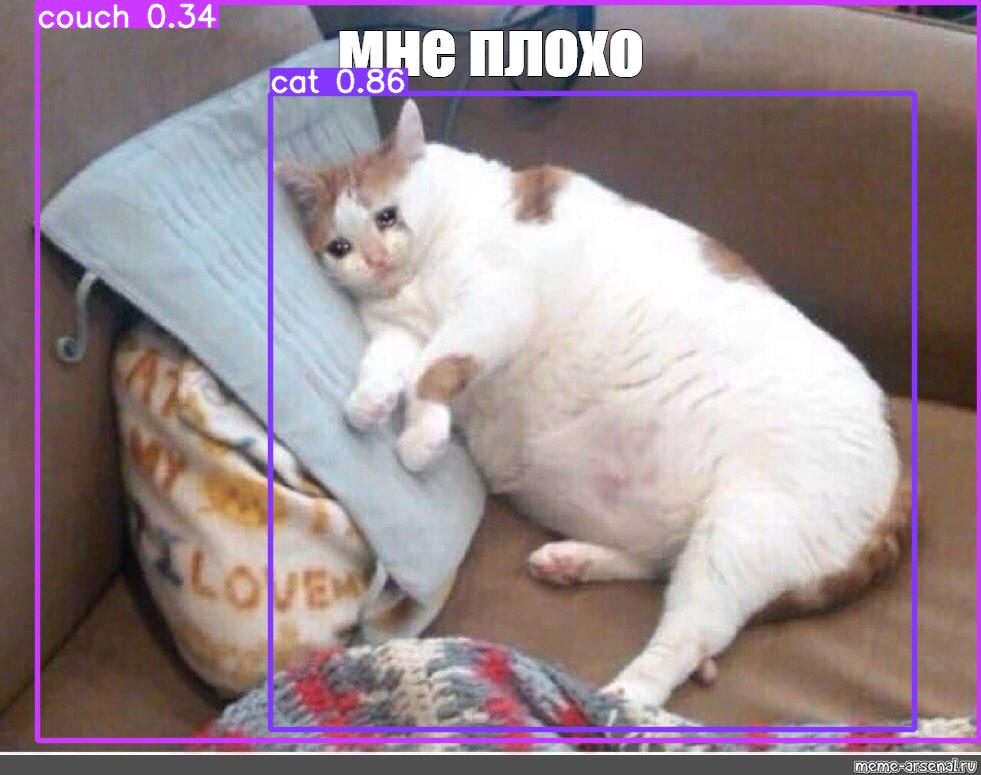

In [ ]:
Image.open('results.jpg')

In [6]:
!pip install Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="yNVGeIEgsBIStpPyeU3k")
project = rf.workspace("labs-hsbu3").project("vegetables-f4ale")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.46, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Vegetables-5 in yolov8:: 100%|██████████| 2010/2010 [00:20<00:00, 96.78it/s] 


In [8]:
dataset.location

'/content/drive/MyDrive/Vegetables-5'

In [ ]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True


[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Vegetables-5/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s